#### Author: Arun Ramesh, University of Houston. https://rpglab.github.io/people/Arun-Venkatesh-Ramesh/
#### Source webpage: https://rpglab.github.io/resources/FL-ML-R-SCUC_Python/
#### If you use any codes/data here for your work, please cite the following paper: 
#####       Arun Venkatesh Ramesh and Xingpeng Li, “Feasibility Layer Aided Machine Learning Approach for Day-Ahead Operations”, IEEE Transactions on Power Systems, Apr. 2023.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
np.random.seed(1)

import sys
nums = np.arange(2000)
np.set_printoptions(threshold=sys.maxsize)

import csv

In [2]:
##### data set 24 Bus 8 Prd

dfX_24 = pd.read_csv("demand500BusWBCorr24Prd.txt")
dfY_24 = pd.read_csv("commitment500BusWBCorr24Prd.txt")

print(dfX_24.info)
print(dfY_24.info)

x = dfX_24.to_numpy()
#x = np.delete(x,0,1) #delete column one sample number
x = x/100
print(x[1])

y = dfY_24.to_numpy()
#y = np.delete(y,0,1) #delete column one sample number
print(y[1])

# Shuffle (x, y) in unison as the later parts of x will almost all be larger digits.
indices = np.arange(len(y))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

# Explicitly set apart 20% for validation data that we never train over.
split_at = len(x) - len(x) // 5
(x_train, x_test) = x[:split_at], x[split_at:]
(y_train, y_test) = y[:split_at], y[split_at:]


print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

print(indices)
print(split_at)

print(x_train[1])
print(y_train[1])

print(x_test[1])
print(y_test[1])

<bound method DataFrame.info of       0  34.78705704502217  0.1  107.84304661416456  0.2  2.611406609323526  \
0     0          29.402657    0           91.150916    0           2.207209   
1     0          38.802001    0          120.289737    0           2.912802   
2     0          39.254796    0          121.693446    0           2.946792   
3     0          28.322181    0           87.801343    0           2.126099   
4     0          36.133968    0          112.018595    0           2.712517   
...  ..                ...  ...                 ...  ...                ...   
1594  0          34.391145    0          108.312047    0           2.580078   
1595  0          35.133973    0          113.001663    0           2.715306   
1596  0          37.048200    0          112.761117    0           2.726223   
1597  0          32.591156    0          100.956789    0           2.503489   
1598  0          33.698085    0          106.423064    0           2.513360   

      0.3  0.4  0.5

1280
1280
319
319
[  75 1283  408 1281 1118 1143 1215  181 1186 1252 1422  248 1314 1406
  292   60  870 1486 1518  478  669  575  194 1080  790 1335  301 1257
  528 1081  351  970  321 1302 1071 1028 1097    8 1432  158 1248 1496
 1240 1045 1559 1424 1366 1253  107 1060  201 1369  858  771  593  558
  241  460  480  111  353  746  644  108  636  177 1038 1444  464 1172
 1074 1292  674 1130   65 1519 1575  487  852 1274  572  693  791  599
 1069  190   53  453 1564  382 1057  857 1333 1317 1181  529  912 1227
 1374 1198 1446   48  991  711 1373  931  632  490  812   91 1098 1415
 1158 1542 1334  948  592 1572   30 1309 1189  953  925 1556  428  202
  286  766 1147   37  799  643 1323  255  418  288  422 1010  628 1084
  719  546  512   80  401  372  101  304  275 1565 1065 1230  733  102
  264  443 1322 1103 1508  268  495 1113  299  577 1242 1592 1233  414
  994 1011  496  918  927  638  462  223 1211 1501  285  536 1343  653
 1539  614 1586 1017 1177  231  724  119 1231 1528 1173  25

In [3]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1280, 12000)
(1280, 2160)
(319, 12000)
(319, 2160)


In [4]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape=(dim,2160))
    b = 0
    return w, b

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1. / ( 1 + np.exp(-z))
    return s

In [6]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    
    m = X.shape[0]
    
    #print(m)
    
    #print(w.shape)
    #print(X.shape)
    #print(b)
    b = np.sum(b)
    #print(b)
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)             # compute activation
    #print(A.shape)
    #print(Y.shape)
    cost = (-1. / m) * np.sum((Y*np.log(A) + (1 - Y)*np.log(1-A)), axis=1)    # compute cost
    #print(cost.shape)
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis=1)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == (2160,))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [8]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate*dw
        b = b -  learning_rate*db
        
        # Record the costs
        #if i % 100 == 0:
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        #if print_cost and i % 100 == 0:
        #    print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [13]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    
    m = X.shape[1]
    #Y_prediction = np.zeros((792, m))
    w = w.reshape(X.shape[0], 2160)
    b = np.sum(b)
    
    # Compute vector "A" predicting the probabilities commitment
    A = sigmoid(np.dot(w.T, X) + b)
    #print (A.shape)
    #print(A.T)        
    return A

In [9]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [10]:
x_train = x_train.T
y_train = y_train.T

x_test = x_test.T
y_test = y_test.T

In [33]:
from timeit import default_timer as timer

print (x_train.shape)
print (y_train.shape)

learning_rates = [0.001, 0.003, 0.005, 0.008, 0.01, 0.03, 0.05]


models = {}
for i in learning_rates:
    start = timer()
    print ("learning rate is: ",i)
    models[i] = model(x_train, y_train, x_test, y_test, num_iterations = 1000, learning_rate = i, print_cost = True)
    end = timer()
    print("training time: ",end - start)
    print ("-------------------------------------------------------")
    
#d = model(x_train, y_train, x_test, y_test, num_iterations = 700, learning_rate = 0.03, print_cost = True)

(12000, 1280)
(2160, 1280)
learning rate is:  0.001
train accuracy: 96.9261874257982 %
test accuracy: 96.93912581740267 %
training time:  1024.5597209000262
-------------------------------------------------------
learning rate is:  0.003
train accuracy: 97.54812846809286 %
test accuracy: 97.55741878124698 %
training time:  986.0617209000047
-------------------------------------------------------
learning rate is:  0.005
train accuracy: 97.67469732147742 %
test accuracy: 97.6826455669233 %
training time:  971.7836480999831
-------------------------------------------------------
learning rate is:  0.008
train accuracy: 97.75234567803145 %
test accuracy: 97.75901411876289 %
training time:  971.9622082000133
-------------------------------------------------------
learning rate is:  0.01
train accuracy: 97.78212046078185 %
test accuracy: 97.78811149336062 %
training time:  970.5443971999921
-------------------------------------------------------
learning rate is:  0.03
train accuracy: 97.92

In [17]:
npindice = np.reshape(indices, (1,1499))
with open("indiceshorizontal.csv","w+",newline="") as my_csv: #index(indices) 1201-1500 test case 299 samples
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(npindice) 
with open("indicesvertical.csv","w+",newline="") as my_csv: #index(indices) 1201-1500 test case 299 samples
    csvWriter = csv.writer(my_csv,delimiter='\n')
    csvWriter.writerows(npindice) 

In [34]:
#print(indices)

for i in learning_rates:
    print ("learning rate is: ",i)
    w = models[i]["w"]
    b = models[i]["b"]
    A_prediction_test = predict(w, b, x_test)
    A_prediction_test = A_prediction_test.T
    
    m = A_prediction_test.shape[0]
    Y_test_hackFull = np.zeros((m,A_prediction_test.shape[1]))
    P = 0.5

    for j in range(m):
        for i in range(A_prediction_test.shape[1]):
        
            # Convert probabilities A[0,i] to actual predictions p[0,i]
            if A_prediction_test[j, i] >= P:
                Y_test_hackFull[j, i] = 1
            
            else:
                Y_test_hackFull[j, i] = 0
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_test.T - Y_test_hackFull)) * 100))
    
    A_prediction_train = predict(w, b, x_train)
    A_prediction_train = A_prediction_train.T
    
    m = A_prediction_train.shape[0]
    Y_train_hackFull = np.zeros((m,A_prediction_train.shape[1]))
    
    for j in range(m):
        for i in range(A_prediction_train.shape[1]):
        
            # Convert probabilities A[0,i] to actual predictions p[0,i]
            if A_prediction_train[j, i] >= P:
                Y_train_hackFull[j, i] = 1
            
            else:
                Y_train_hackFull[j, i] = 0
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_train.T - Y_train_hackFull)) * 100))
    print ("-------------------------------------------------------")
    
    

learning rate is:  0.001
test accuracy: 98.50864971554627 %
train accuracy: 98.48137297453704 %
-------------------------------------------------------
learning rate is:  0.003
test accuracy: 98.50864971554627 %
train accuracy: 98.48137297453704 %
-------------------------------------------------------
learning rate is:  0.005
test accuracy: 98.5090851039127 %
train accuracy: 98.48180700231481 %
-------------------------------------------------------
learning rate is:  0.008
test accuracy: 98.51837338906304 %
train accuracy: 98.49113859953704 %
-------------------------------------------------------
learning rate is:  0.01
test accuracy: 98.52896783931267 %
train accuracy: 98.50473813657408 %
-------------------------------------------------------
learning rate is:  0.03
test accuracy: 98.67830604899571 %
train accuracy: 98.66789641203704 %
-------------------------------------------------------
learning rate is:  0.05
test accuracy: 98.81400208986416 %
train accuracy: 98.8008174189814

In [40]:
i = 0.05
print ("learning rate is: ",i)
w = models[i]["w"]
b = models[i]["b"]
A_prediction_test = predict(w, b, x_test)
A_prediction_test = A_prediction_test.T
    
m = A_prediction_test.shape[0]
Y_test_hackFull = np.zeros((m,A_prediction_test.shape[1]))
P = 0.5

for j in range(m):
    for k in range(A_prediction_test.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A_prediction_test[j, k] >= P:
            Y_test_hackFull[j, k] = 1
            
        else:
            Y_test_hackFull[j, k] = 0
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_test.T - Y_test_hackFull)) * 100))
    
A_prediction_train = predict(w, b, x_train)
A_prediction_train = A_prediction_train.T
    
m = A_prediction_train.shape[0]
Y_train_hackFull = np.zeros((m,A_prediction_train.shape[1]))
    
for j in range(m):
    for k in range(A_prediction_train.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A_prediction_train[j, k] >= P:
            Y_train_hackFull[j, k] = 1
            
        else:
            Y_train_hackFull[j, k] = 0
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_train.T - Y_train_hackFull)) * 100))
print ("-------------------------------------------------------")

learning rate is:  0.05
test accuracy: 98.81400208986416 %
train accuracy: 98.80081741898148 %
-------------------------------------------------------


In [67]:
sample = 100

print(y_test.T[sample])
print(y_test.T[sample]-Y_test_hackFull[sample])
print(np.mean(Y_test_hackFull[sample]))
print(Y_test_hackFull[sample])
print(A_prediction_test[sample])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 

In [23]:
with open("commitment500Bus24PrdTestSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(Y_test_hackFull)

In [24]:
x_test_round = np.around(x_test, decimals=4)
x_test_round = x_test_round.T
with open("demand500Bus24PrdTestSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(x_test_round)

In [25]:
A_prediction_test_round = np.around(A_prediction_test, decimals=6)
#A_prediction_test_round = A_prediction_test_round.T
with open("probabilities500Bus24PrdTestSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(A_prediction_test_round)

In [26]:
with open("commitment500Bus24PrdTrainSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(Y_train_hackFull)

In [27]:
x_train_round = np.around(x_train, decimals=3)
x_train_round = x_train_round.T
with open("demand500Bus24PrdTrainSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(x_train_round)

In [28]:
with open("probabilities500Bus24PrdTrainSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(A_prediction_train)

In [29]:
with open("UgtAct500Bus24PrdTest4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(y_test.T)

In [30]:
with open("UgtAct500Bus24PrdTrain4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(y_train.T)

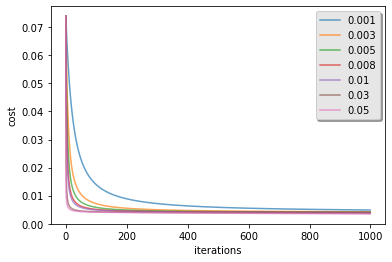

[[0.0739357  0.07128318 0.06876968 0.06638763 0.06412976 0.06198906
  0.05995887 0.05803283 0.05620489 0.05446933 0.05282073 0.051254
  0.04976431 0.04834713 0.04699821 0.04571355 0.0444894  0.04332225
  0.04220878 0.04114593 0.04013079 0.03916065 0.03823298 0.0373454
  0.03649569 0.03568176 0.03490167 0.03415358 0.03343579 0.03274668
  0.03208474 0.03144857 0.03083684 0.03024831 0.0296818  0.02913621
  0.02861051 0.02810373 0.02761495 0.02714332 0.02668802 0.02624828
  0.02582338 0.02541266 0.02501545 0.02463115 0.0242592  0.02389905
  0.02355018 0.02321211 0.02288439 0.02256657 0.02225824 0.02195902
  0.02166853 0.02138642 0.02111234 0.020846   0.02058708 0.02033529
  0.02009037 0.01985205 0.01962008 0.01939422 0.01917426 0.01895998
  0.01875116 0.01854763 0.01834918 0.01815564 0.01796684 0.01778262
  0.01760281 0.01742728 0.01725588 0.01708846 0.01692491 0.01676509
  0.01660888 0.01645617 0.01630685 0.01616081 0.01601795 0.01587817
  0.01574138 0.01560748 0.01547639 0.01534803 0.015

In [41]:
plt.clf()

NCost = int(models[0.003]["num_iterations"])#/100)

costarray_full = np.zeros((len(learning_rates),NCost))
costarray_single = np.zeros(NCost)

#print (NCost)
for i in range(7):#len(learning_rates)):
    costarray_single = np.zeros(NCost)
    for j in range(NCost):
        #print (j)
        costarray_single[j] = np.mean(np.squeeze(models[learning_rates[i]]["costs"][j])) 
    costarray_full[i] = costarray_single
    plt.plot(costarray_full[i], label= str(models[learning_rates[i]]["learning_rate"]),alpha=0.7)
    #print (np.squeeze(models[i]["costs"][2]))

#plt.plot(costarray_full[i], label= str(models[0.001]["learning_rate"]), alpha=1)
#plt.plot(np.squeeze(models[0.001]["costs"][1]), label= str(models[0.001]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='best', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

print (costarray_full)

In [37]:
print (np.squeeze(models[0.003]["costs"][1]).shape)

(2160,)


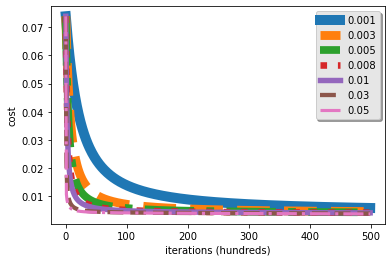

In [32]:
plt.clf()
grid=[x for x in range(500)]
i = 0
for gg,graph in enumerate(costarray_full[0:7]):
    lw=10-8*gg/len(costarray_full)
    ls=['-','--','-.',':'][gg%4]
    plt.plot(grid,graph,label=str(models[learning_rates[i]]["learning_rate"]), linestyle=ls, linewidth=lw)
    i = i+1
    
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='best', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()